# Importation des librairies

In [ ]:
#Importation des librairies
import pandas as pd
import seaborn as sns

# Téléchargement du dataset Kaggle

In [ ]:
#API Kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'aharhyendi'
os.environ['KAGGLE_KEY'] = '1e906d28086391a3dd55467d9bd96c35'


In [ ]:
#Telechargement du dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip the dataset
! unzip breast-cancer-wisconsin-data.zip

'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


# Chargement et exploration du dataset

In [ ]:
#Chargement du dataset
df = pd.read_csv('data.csv')

In [ ]:
#Affiche les 5 premières lignes du dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#Drop columns with null values
df = df.dropna(axis=1)

In [12]:
# Nombre de doublons
print("Nombre de doublons : ", df.duplicated().sum())

Nombre de doublons :  0


In [8]:
#Nombre de lignes et de colonnes
print("Nombre de lignes : ", df.shape[0])
print("Nombre de colonnes : ", df.shape[1])

Nombre de lignes :  569
Nombre de colonnes :  32


In [11]:
# Nombre de M et B dans notre dataset
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Encodage des colonnes

In [13]:
#Affichage du type de chaque colonne
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encodage de la variable cible diagnosis avec label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [16]:
#Affichage du dataframe
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Séparation du jeu de données & Mise à l'échelle des caractéristiques

In [19]:
#On recupere toutes les colonnes sauf la colonne diagnosis
X = df.drop(columns=['id','diagnosis'])
Y = df['diagnosis']

In [21]:
#Séparation des données en données d'entrainement et de test (75% - 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [22]:
#Mise a l'echelle des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [23]:
#Affichage des données d'entrainement
X_train

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

# Mise en place du model de regression logistique

In [30]:
#Regression logistique de classification
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
#Prédiction sur les données de test
Y_pred = model.predict(X_test)
#Affichage des résultats
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[89  0]
 [ 2 52]]


# Evaluation des performances

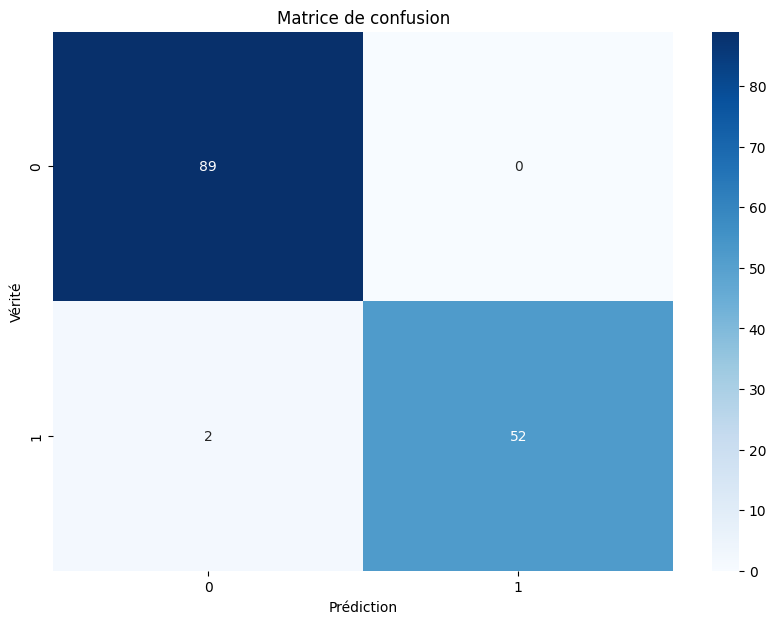

In [25]:
#Affichage de la matrice de confusion
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion')
plt.show()

In [31]:
#Obtention de l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy : ", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy :  0.986013986013986
[[89  0]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

